# Image Segmentation - Thresholding 

In [1]:
# Import necessary libraries
import cv2 # image processing and filtering such as color space conversion, histograms, and, geometric transformations
import numpy as np # arithmetic and algebra 
from matplotlib import pyplot as plt # data visualization 
from PIL import Image # Image editing, drawing, and enhancement 

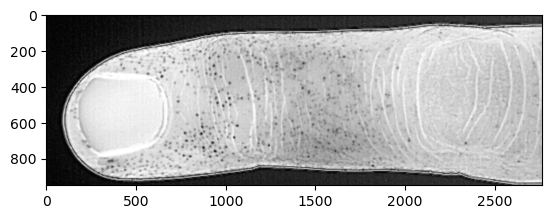

In [30]:
# OpenCV - thresholding 
# import image 
image_path = '/Users/rickysu/Desktop/internships/finger1.png'
# image_path = '/Users/rickysu/Desktop/internships/palm.png'
# image_path = '/Users/rickysu/Desktop/internships/fingers.png'
init_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # change the image to gray scale 

# Display the image using matplotlib
plt.imshow(init_image, cmap='gray')  # cmap='gray' ensures it's shown in grayscale
plt.show()

## Global Thresholding - binary thresholding 

In [31]:
# Apply simple binary thresholding
# If a pixel value is greater than the threshold (let's say 127), it is set to 255 (white); otherwise, it is set to 0 (black).
# cv2.threshold is an OpenCV function that applies fixed-level thresholding to a single-channel array
# cv2.threshold (source image, threshold value, maxium value to use with the "thresh binary", 
#                                               it creates a binary image where the thresholding condition is applied)
# thresholded_image: result of the thresholding operation, a binary image where pixels are either 0 or 255
# retval: is the threshold value used

retval, thresholded_image = cv2.threshold(init_image, 127, 255, cv2.THRESH_BINARY)

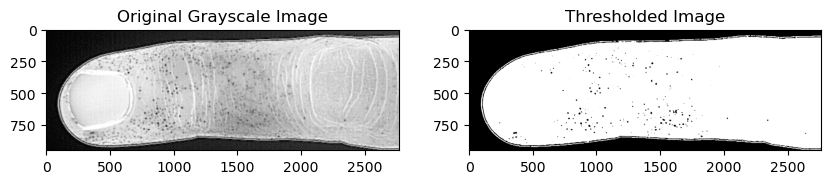

In [32]:
# Display the original and thresholded images for comparison

plt.figure(figsize=(10, 5)) # creates the new figure for plotting in the specified size

 # creates a subplot in a grid that is 1 row by 2 columns, and selects the first subplot as the current plot.
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(init_image, cmap='gray')

#creates a subplot in a grid that is 1 row by 2 columns, and selects the second subplot as the current plot.
plt.subplot(1, 2, 2) 
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

## Adaptive Thresholding 
### Adaptive thresholding adjusts the threshold value for different regions of the image based on their local pixel intensities

## 1. Mean thresholding

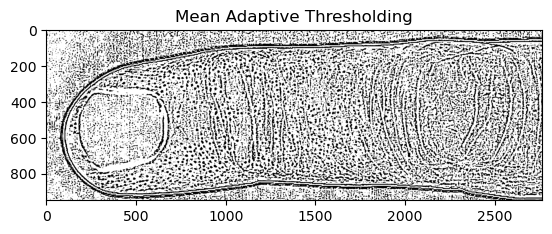

In [33]:
# Determine threshold for each pixel: 
# For every pixel, the algorithm calculates the mean of the pixel values in a block (neighborhood) around that pixel 
# (excluding the pixel itself). The size of this block is defined by the parameter 11, meaning an 11x11 block.

# Applying the threshold:
# If the pixel's value is greater than the mean minus C (where C is 2 in this case), the pixel is set to the maximum value (255, white). 
# Otherwise, it is set to the minimum value (0, black).

mean_thresh_image = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the image using matplotlib
plt.imshow(mean_thresh_image, cmap='gray')  # cmap='gray' ensures it's shown in grayscale
plt.title('Mean Adaptive Thresholding') 
plt.show()

## 2. Gaussian thresholding

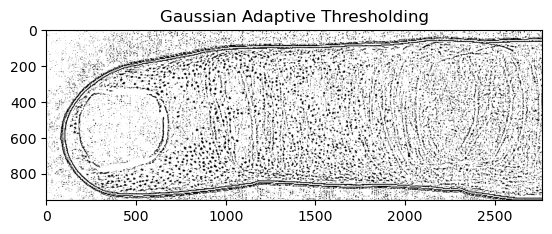

In [34]:
# Determining the Threshold for Each Pixel: 
# For every pixel in the image, the algorithm calculates a weighted sum of the pixel values in its neighborhood. 
# The weights are determined by a Gaussian function, centered on the pixel in question. 
# The size of the neighborhood is defined by the block size, which is 11x11 in this case.

# Applying the Threshold: 
# The calculated Gaussian-weighted sum minus the constant C (2 in this instance) serves as the threshold. 
# If a pixel's value is higher than this threshold, it is set to the maximum value (255, white). 
# Otherwise, it is set to the minimum value (0, black).

gaussian_thresh_image = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the image using matplotlib
plt.imshow(gaussian_thresh_image, cmap='gray')  # cmap='gray' ensures it's shown in grayscale
plt.title('Gaussian Adaptive Thresholding') 
plt.show()

## Find the contour of the image and mask out the area outside the contour --- Data Cleaning 

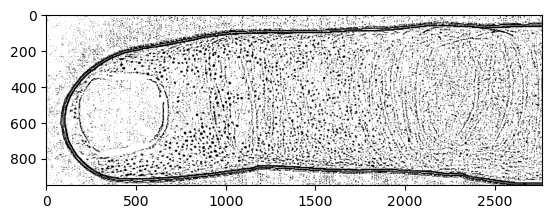

In [35]:
# Apply Gaussian blur to reduce noise (optional but recommended)
blurred = cv2.GaussianBlur(init_image, (5, 5), 0)

# Perform Canny edge detection
# Lower_threshold and Upper_threshold
# Parameters define the intensity range for detecting edges. Pixels with intensity gradients above the upper threshold 
# are considered strong edges, while pixels with gradients between the lower and upper thresholds are considered as weak edges
# and are included only if they are connected to strong edges.
lower_threshold = 50
upper_threshold = 150
edges = cv2.Canny(blurred, lower_threshold, upper_threshold)

# Find contours in the binary edge map
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
# The -1 parameter indicates that all contours should be drawn, (0, 255, 0) specifies the color of the contours (green in this case), 
# and 2 is the thickness of the contour lines.
cv2.drawContours(gaussian_thresh_image, contours, -1, (0, 255, 0), 2)

# Convert the color space from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(gaussian_thresh_image, cv2.COLOR_BGR2RGB)

# Display the resulting image using Matplotlib
plt.imshow(image_rgb)
plt.show()

## Convert the Image from white to black

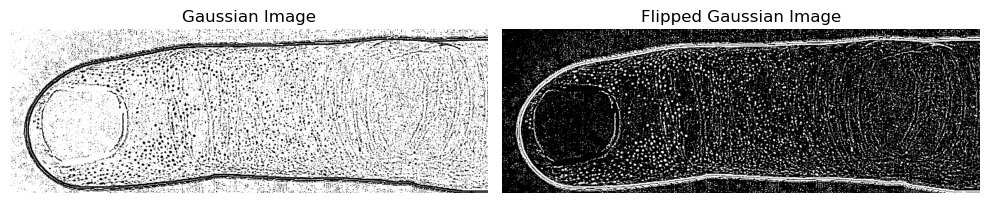

In [36]:
# Flip the color of the image from white to black 
image = gaussian_thresh_image

# Convert the image to a NumPy array
image_array = np.array(gaussian_thresh_image)

# Flip the grayscale values
flipped_array = 255 - image_array

# Create a new image from the flipped array
flipped_image = Image.fromarray(flipped_array)

# Display the original and flipped images side by side using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image, cmap='gray')
ax1.set_title('Gaussian Image')
ax1.axis('off')

ax2.imshow(flipped_image, cmap='gray')
ax2.set_title('Flipped Gaussian Image')
ax2.axis('off')

plt.tight_layout()
plt.show()